# Anticipez  les besoins en consommation de bâtiments
## Nettoyage des données

## Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

## Exploration

In [3]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [4]:
df.shape

(3376, 46)

In [5]:
df.columns.tolist()

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'Comments',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [6]:
df.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [7]:
df.BuildingType.unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [8]:
df.ComplianceStatus.unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [9]:
df.ComplianceStatus.value_counts()

Compliant                       3211
Error - Correct Default Data     113
Non-Compliant                     37
Missing Data                      15
Name: ComplianceStatus, dtype: int64

In [10]:
df.Outlier.value_counts()

Low outlier     23
High outlier     9
Name: Outlier, dtype: int64

In [11]:
df.DefaultData.value_counts()

False    3263
True      113
Name: DefaultData, dtype: int64

In [12]:
df.loc[df.DefaultData == True]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
22,28,2016,SPS-District K-12,K-12 School,Graham Hill Elementary,5149 S. Graham St.,Seattle,WA,98118.0,1102000138,...,2.746059e+05,9.369550e+05,6025.229004,6.025230e+05,True,NaN,Error - Correct Default Data,NaN,38.53,0.69
30,36,2016,SPS-District K-12,K-12 School,Jane Addams Middle,11051 34th Ave. N.E.,Seattle,WA,98125.0,0752000170,...,5.708092e+05,1.947601e+06,48315.718750,4.831572e+06,True,NaN,Error - Correct Default Data,NaN,270.18,1.68
38,51,2016,SPS-District K-12,K-12 School,Eckstein Middle,3003 N.E. 75th St.,Seattle,WA,98115.0,0425049022,...,4.688405e+05,1.599684e+06,47994.433590,4.799443e+06,True,NaN,Error - Correct Default Data,NaN,266.05,1.52
86,125,2016,SPS-District K-12,K-12 School,Mercer International Middle,1600 Columbian Way S.,Seattle,WA,98108.0,1624049214,...,6.631945e+05,2.262820e+06,41932.066410,4.193207e+06,True,NaN,Error - Correct Default Data,NaN,238.48,1.82
87,127,2016,SPS-District K-12,K-12 School,Orca K-8 School,5215 46th Ave. S.,Seattle,WA,98118.0,1704900242,...,4.209894e+05,1.436416e+06,1969.832520,1.969830e+05,True,NaN,Error - Correct Default Data,NaN,20.48,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,29069,2016,Multifamily LR (1-4),Senior Care Community,Lakeshore,11448 Rainier Ave S,Seattle,WA,98178.0,1180001715,...,1.265544e+06,4.318036e+06,24059.349610,2.405935e+06,True,NaN,Error - Correct Default Data,NaN,157.88,1.26
3126,39332,2016,SPS-District K-12,K-12 School,South Shore K-8,4800 S. Henderson,Seattle,WA,98118.0,2123700250,...,8.805380e+05,3.004396e+06,19549.021480,1.954902e+06,True,NaN,Error - Correct Default Data,NaN,124.77,0.90
3366,50210,2016,Nonresidential COS,Office,Central West HQ / Brown Bear,1403 w howe,Seattle,WA,NaN,2425039137,...,1.473235e+05,5.026678e+05,0.000000,0.000000e+00,True,NaN,Error - Correct Default Data,NaN,3.50,0.26
3369,50220,2016,Nonresidential COS,Office,Genesee/SC SE HQ,4420 S Genesee,Seattle,WA,NaN,4154300585,...,8.134140e+04,2.775369e+05,1102.729980,1.102730e+05,True,NaN,Error - Correct Default Data,NaN,7.79,0.51


In [13]:
df.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


# Nettoyage

## Suppression des doublons

In [14]:
def mergeDuplicate(data, key) :
    """ Fonction de merge des doublons : moyenne sur numérique, first filled sur non numérique"""
    
    duplicate = data.duplicated(subset=key, keep=False)
    
    if True not in list(duplicate.unique()):
        print("Aucun doublon sur {}".format(key))
        return False
    
    
    print("Nombre de lignes doublons :", len(data[duplicate]))
    
    data_gb = df.loc[df[key].duplicated(keep=False),:].groupby(key)
    data_nodup = pd.DataFrame()
    
    # Identification of numerical and non-numerical columns
    numeric_columns = list(data.select_dtypes(include=[np.number]).columns.values)
    
    # defining aggregation function for non-numerical columns
    def agg_mode(x): m = pd.Series.mode(x); return m.values[0] if not m.empty else np.nan
    
    for column in data.columns:
        if type(column) != str:
            data_nodup[column] = data_gb[column].agg('mean')
        else:
            data_nodup[column] = data_gb[column].agg(agg_mode)
    
    data_out = data.drop_duplicates(subset=key, keep=False)
    data_out = pd.concat([data_out, data_nodup], ignore_index=True)
    return data_out

In [15]:
mergeDuplicate(df, 'OSEBuildingID')

Aucun doublon sur OSEBuildingID


False

In [16]:
mergeDuplicate(df, ['PropertyName', 'Address'])

Aucun doublon sur ['PropertyName', 'Address']


False

## Suppression ComplianceStatus "Non compliant" ?

In [17]:
df_cleaned = df.loc[df.ComplianceStatus == 'Compliant']
df_cleaned.shape

(3211, 46)

## Suppression Outlier ?

In [18]:
df_cleaned.loc[df.Outlier.notna()]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


Pas d'outliers sur les compliants

##  Suppression targets NaN

In [19]:
mask = (df_cleaned['TotalGHGEmissions'].isna() | df_cleaned['SiteEnergyUse(kBtu)'].isna())

df_cleaned = df_cleaned.loc[~mask]
df_cleaned.shape

(3207, 46)

Seulement 4 lignes supprimées suite à compliants

## Séléction des features utiles

Inutiles : 
'OSEBuildingID',
 'DataYear',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'DefaultData',
 'Comments',
 'ComplianceStatus',
 'Outlier'

In [20]:
data_to_drop = ['OSEBuildingID',
                'DataYear',
                'PropertyName',
                'Address',
                'City',
                'State',
                'ZipCode',
                'TaxParcelIdentificationNumber',
                'DefaultData',
                'Comments',
                'ComplianceStatus',
                'Outlier']

In [21]:
df_cleaned.drop(columns=data_to_drop, inplace=True, errors='ignore')
df_cleaned

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,Hotel,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,...,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83
1,NonResidential,Hotel,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,...,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86
2,NonResidential,Hotel,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,...,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19
3,NonResidential,Hotel,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,...,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67
4,NonResidential,Hotel,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,...,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,Nonresidential COS,Other,1,DELRIDGE NEIGHBORHOODS,47.54067,-122.37441,1982,1.0,1,18261,...,136.600006,9.320821e+05,1.025432e+06,0.00,1.853347e+05,6.323620e+05,2997.199951,2.997200e+05,20.33,1.11
3372,Nonresidential COS,Other,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,...,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01
3373,Nonresidential COS,Other,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,...,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99
3374,Nonresidential COS,Mixed Use Property,1,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,14101,...,110.800003,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57


## Taux remplissages par colonnes

In [22]:
prct_na = df_cleaned.notna().sum() / df_cleaned.shape[0] * 100

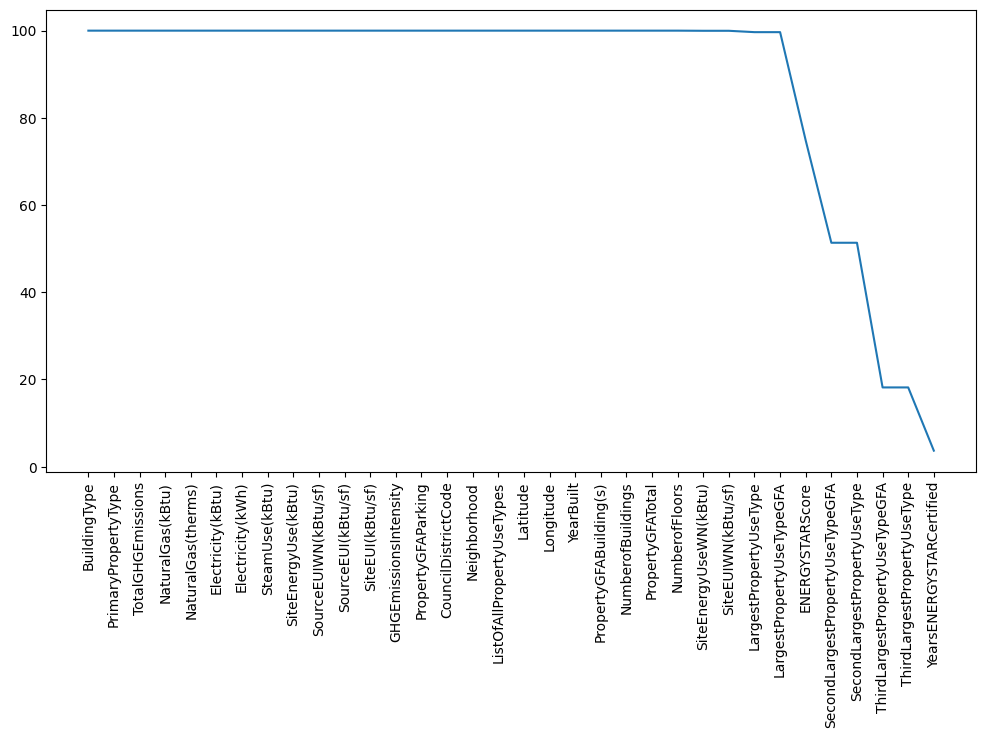

In [23]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.plot(prct_na.sort_values(ascending=False))

In [24]:
prct_na.sort_values(ascending=True).head(10)

YearsENERGYSTARCertified            3.679451
ThirdLargestPropertyUseTypeGFA     18.178983
ThirdLargestPropertyUseType        18.178983
SecondLargestPropertyUseType       51.356408
SecondLargestPropertyUseTypeGFA    51.356408
ENERGYSTARScore                    74.805114
LargestPropertyUseType             99.657000
LargestPropertyUseTypeGFA          99.657000
SiteEnergyUseWN(kBtu)              99.968818
SiteEUIWN(kBtu/sf)                 99.968818
dtype: float64

On ne garde que les features qui ont un taux de remplissage > 70% (on garde ES Score, et on retire des infos d'utilisation secondaires et tertiaires, pas utile pour les modélisations)

In [25]:
df_cleaned.drop(columns=prct_na.loc[prct_na < 70].index, inplace=True, errors='ignore')
df_cleaned

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,Hotel,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,...,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83
1,NonResidential,Hotel,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,...,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86
2,NonResidential,Hotel,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,...,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19
3,NonResidential,Hotel,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,...,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67
4,NonResidential,Hotel,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,...,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,Nonresidential COS,Other,1,DELRIDGE NEIGHBORHOODS,47.54067,-122.37441,1982,1.0,1,18261,...,136.600006,9.320821e+05,1.025432e+06,0.00,1.853347e+05,6.323620e+05,2997.199951,2.997200e+05,20.33,1.11
3372,Nonresidential COS,Other,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,...,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01
3373,Nonresidential COS,Other,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,...,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99
3374,Nonresidential COS,Mixed Use Property,1,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,14101,...,110.800003,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57


## Taux de remplissage par lignes

<Axes: >

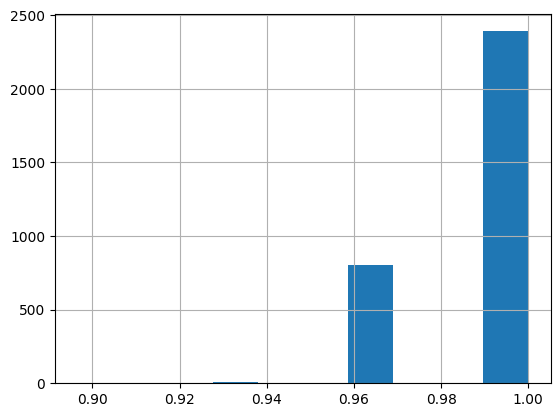

In [26]:
row_filling_rate = df_cleaned.count(axis=1) / df_cleaned.shape[1]
row_filling_rate.hist()

In [27]:
row_filling_rate.sort_values(ascending=True).head(10)

3040    0.896552
2336    0.896552
2459    0.896552
353     0.896552
563     0.931034
2545    0.931034
1077    0.931034
1483    0.931034
1756    0.931034
1147    0.931034
dtype: float64

# Analyse

## Univariée

### Targets

In [28]:
df_cleaned[['TotalGHGEmissions','SiteEnergyUse(kBtu)']].describe()

,TotalGHGEmissions,SiteEnergyUse(kBtu)
count,3207.000000,3.207000e+03
mean,122.211886,5.539669e+06
std,551.534876,2.212364e+07
min,-0.800000,5.713320e+04
25%,9.640000,9.387549e+05
50%,33.920000,1.809587e+06
75%,94.385000,4.277747e+06
max,16870.980000,8.739237e+08


Suppression des valeurs <=0 car impossible pour des émissions de batiments

In [29]:
df_cleaned.loc[df_cleaned.TotalGHGEmissions <= 0]

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
513,NonResidential,Supermarket / Grocery Store,7,MAGNOLIA / QUEEN ANNE,47.63718,-122.37734,2008,1.0,1,57176,...,0.0,1.252517e+07,1.284386e+07,0.0,0.00000,0.0,0.0,0.0,0.0,0.00
1323,Multifamily LR (1-4),Low-Rise Multifamily,4,LAKE UNION,47.64272,-122.32866,1974,1.0,4,37361,...,0.0,8.801155e+05,9.197677e+05,0.0,0.00000,0.0,0.0,0.0,0.0,0.00
3206,NonResidential,Small- and Mid-Sized Office,3,CENTRAL,47.61432,-122.31257,2013,1.0,6,52000,...,-2.1,3.427261e+05,2.401321e+05,0.0,-33826.80078,-115417.0,0.0,0.0,-0.8,-0.02


In [30]:
df_cleaned.drop(index=df_cleaned.loc[df_cleaned.TotalGHGEmissions <= 0].index, inplace=True)

In [31]:
df_cleaned[['TotalGHGEmissions','SiteEnergyUse(kBtu)']].describe()

,TotalGHGEmissions,SiteEnergyUse(kBtu)
count,3204.000000,3.204000e+03
mean,122.326567,5.540565e+06
std,551.780362,2.213331e+07
min,0.400000,5.713320e+04
25%,9.650000,9.404869e+05
50%,33.960000,1.810547e+06
75%,94.500000,4.272900e+06
max,16870.980000,8.739237e+08


In [32]:
# Calcul de la variance des targets
df_cleaned[['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']].var()

TotalGHGEmissions      3.044616e+05
SiteEnergyUse(kBtu)    4.898833e+14
dtype: float64

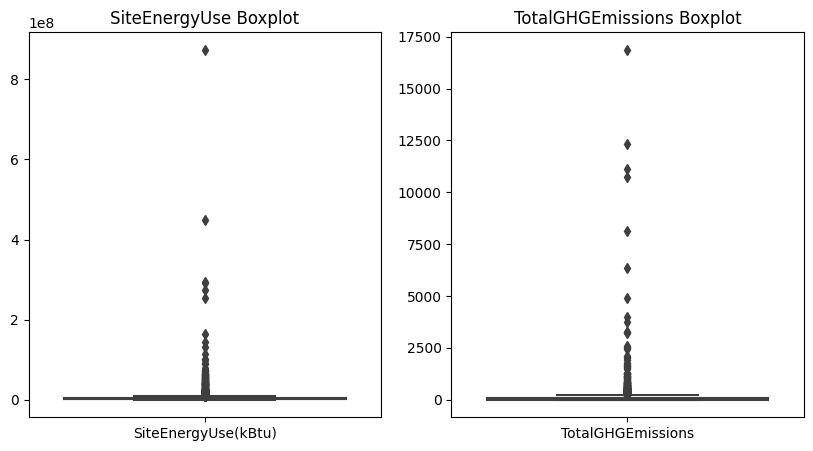

In [33]:
# Création de la figure et des sous-figures
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data=df_cleaned[['SiteEnergyUse(kBtu)']], ax=axs[0])
axs[0].title.set_text('SiteEnergyUse Boxplot')

sns.boxplot(data=df_cleaned[['TotalGHGEmissions']], ax=axs[1])
axs[1].title.set_text('TotalGHGEmissions Boxplot')

#### Passage au log

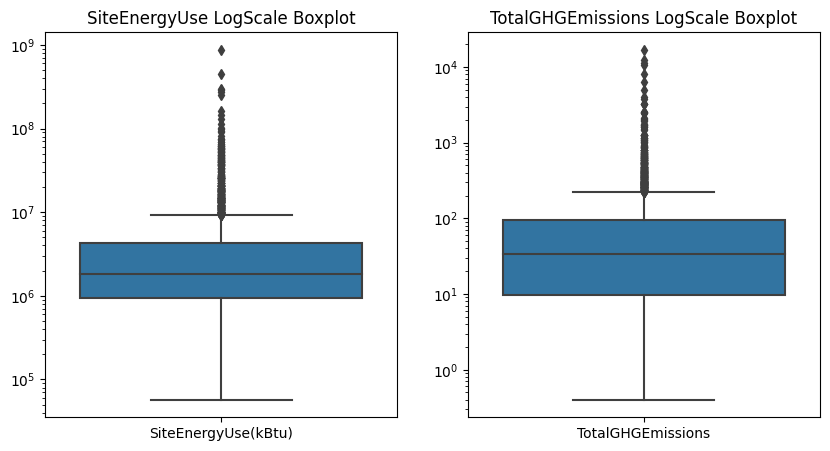

In [34]:
# Création de la figure et des sous-figures
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data=df_cleaned[['SiteEnergyUse(kBtu)']], ax=axs[0])
axs[0].title.set_text('SiteEnergyUse LogScale Boxplot')
axs[0].set_yscale('log')

sns.boxplot(data=df_cleaned[['TotalGHGEmissions']], ax=axs[1])
axs[1].set_yscale('log')
axs[1].title.set_text('TotalGHGEmissions LogScale Boxplot')

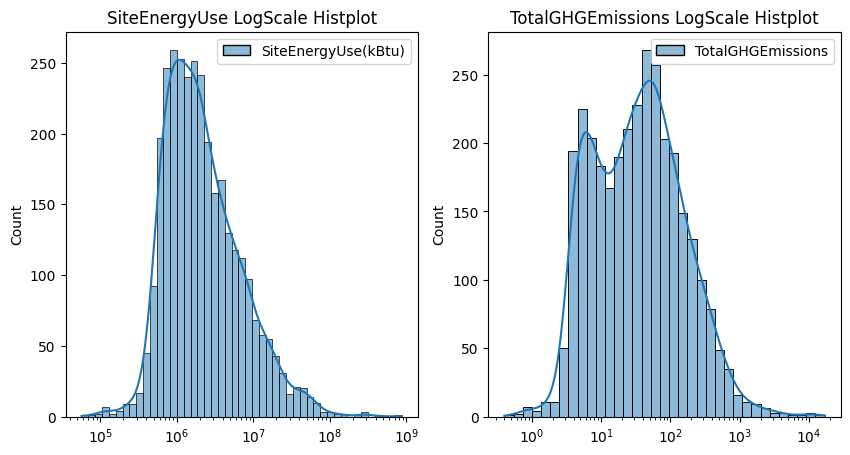

In [35]:
# Création de la figure et des sous-figures
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=df_cleaned[['SiteEnergyUse(kBtu)']], log_scale=True, kde=True, ax=axs[0])
axs[0].title.set_text('SiteEnergyUse LogScale Histplot')

sns.histplot(data=df_cleaned[['TotalGHGEmissions']], log_scale=True, kde=True, ax=axs[1])
axs[1].title.set_text('TotalGHGEmissions LogScale Histplot')

## Bivariée

### Nuage de point sur coordonnées des batiments

Text(0.5, 1.0, 'ENERGYSTARScore vs Répartition spatiale des batiments')

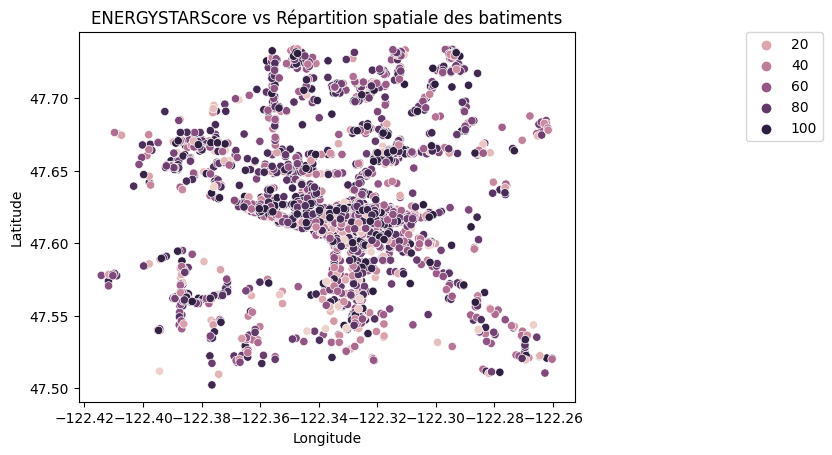

In [36]:
sns.scatterplot(data=df_cleaned, x="Longitude", y="Latitude", hue='ENERGYSTARScore')
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right', borderaxespad=0)
plt.title('ENERGYSTARScore vs Répartition spatiale des batiments')

### Bat Type vs Energy used (/sf)

Text(0.5, 1.0, "Consommation d'énergie par unité de surface en fonction du type de batiment")

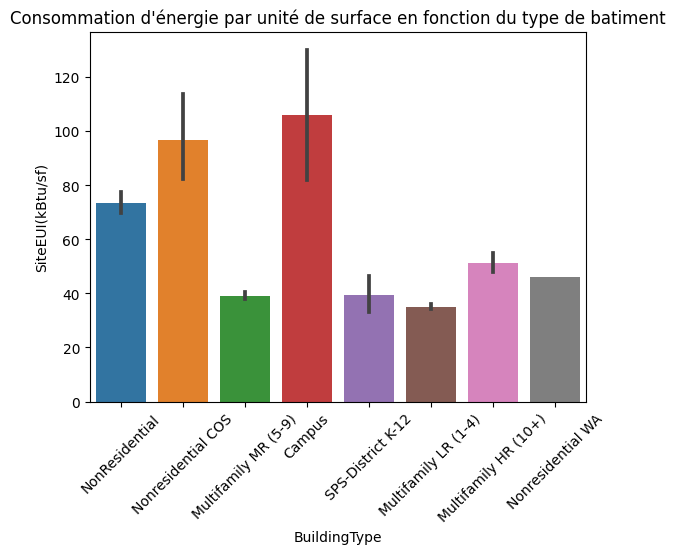

In [37]:
plt.xticks(rotation=45)
sns.barplot(data=df_cleaned, x='BuildingType', y='SiteEUI(kBtu/sf)') 
plt.title("Consommation d'énergie par unité de surface en fonction du type de batiment")

### Bat Size vs Energy used

Text(0.5, 1.0, "Relation entre la surface des bâtiments, la consommation d'énergie et l'année de construction")

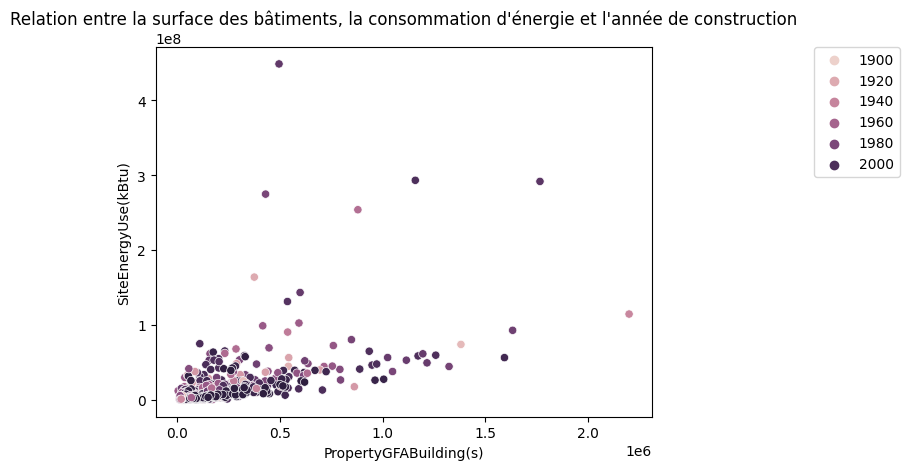

In [38]:
sns.scatterplot(data=df_cleaned.loc[df_cleaned['PropertyGFABuilding(s)']<9000000], x='PropertyGFABuilding(s)', y='SiteEnergyUse(kBtu)', hue='YearBuilt')
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right', borderaxespad=0)
plt.title("Relation entre la surface des bâtiments, la consommation d'énergie et l'année de construction")

In [39]:
df_cleaned.loc[df_cleaned['PropertyGFABuilding(s)']>9000000]

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
3274,Campus,University,4,NORTHEAST,47.65644,-122.31041,1900,111.0,0,9320156,...,0.0,873923712.0,0.0,84985240.0,192577488.0,657074389.0,0.0,0.0,11140.56,1.2


### Matrice de corrélation

In [40]:
df_cleaned.shape

(3204, 29)

In [41]:
df_cleaned.dropna().shape

(2388, 29)

On travaille sur les valeurs non nulles pour éviter les erreurs de corrélation

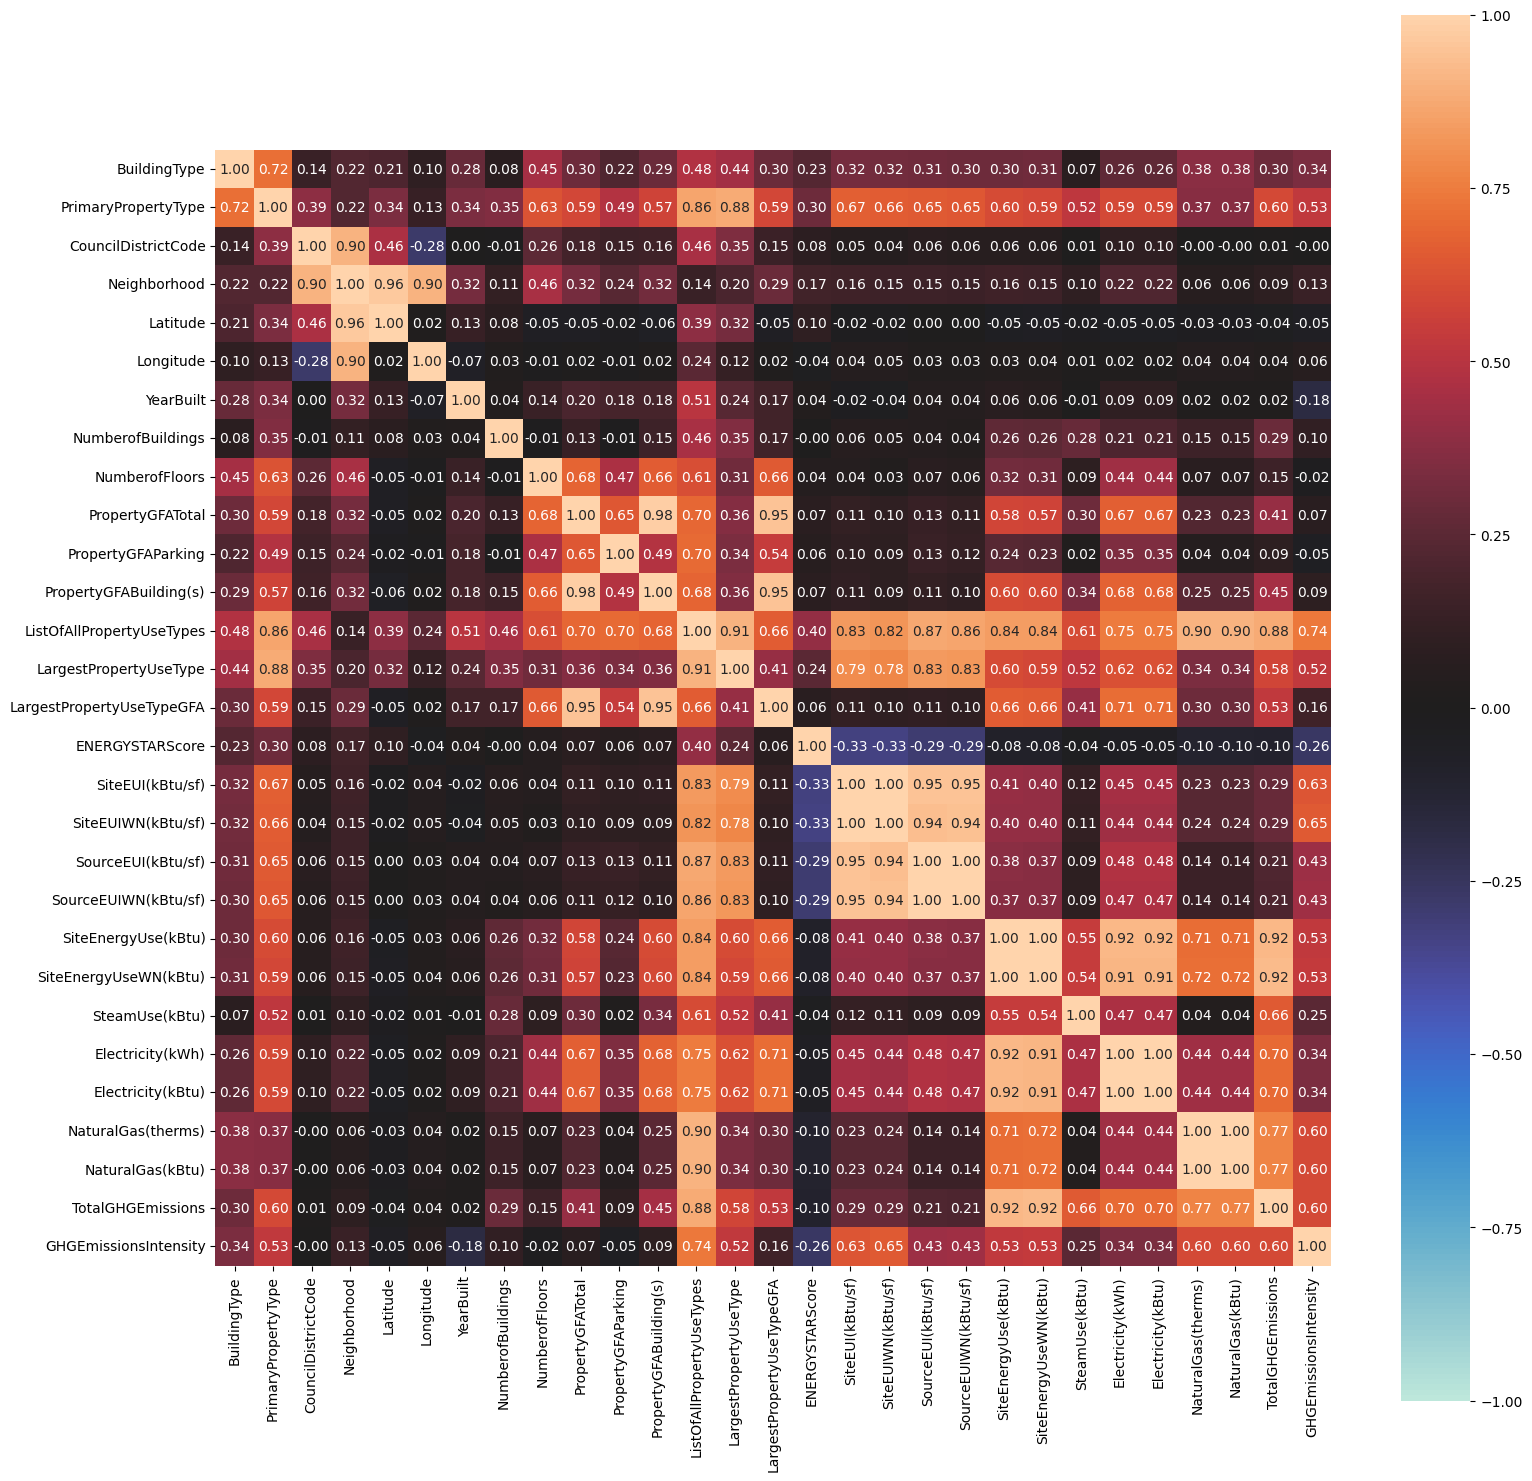

In [42]:
from dython.nominal import associations

corr_matrix = associations(df_cleaned.dropna(), figsize=(18,18))

### Ajout d'un booléen pour Energy, Steam & gas

In [43]:
df_cleaned['ElecBool'] = df_cleaned['Electricity(kBtu)'].astype(bool)
df_cleaned['SteamBool'] = df_cleaned['SteamUse(kBtu)'].astype(bool)
df_cleaned['GasBool'] = df_cleaned['NaturalGas(kBtu)'].astype(bool)

Suppression des features fortements corrélées & Non structurelles :  
- PropertyGFATotal, LargestPropertyUseTypeGFA => PropertyGFABuilding(s)
- Latitude, Longitude, CouncilDistrictCode => Neighborhood
- ListOfAllPropertyUseTypes, LargestPropertyUseType => PrimaryPropertyType
- SiteEnergyUseWN(kBtu) => SiteEnergyUse(kBtu)
- Electricity(kWh) => Electricity(kBtu)
- NaturalGas(therms) => NaturalGas(kBtu)
- SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEUI(kBtu/sf), Electricity(kBtu), NaturalGas(kBtu) & SteamUse(kBtu), SiteEUI(kBtu/sf), GHGEmissionsIntensity => Non structurelles

In [44]:
data_to_drop = ['PropertyGFATotal',
                'LargestPropertyUseTypeGFA',
                'Latitude',
                'Longitude',
                'CouncilDistrictCode',
                'ListOfAllPropertyUseTypes',
                'LargestPropertyUseType',
                'SiteEUIWN(kBtu/sf)',
                'SourceEUI(kBtu/sf)',
                'SourceEUIWN(kBtu/sf)',
                'SiteEnergyUseWN(kBtu)',
                'Electricity(kWh)',
                'NaturalGas(therms)',
                'Electricity(kBtu)', 
                'NaturalGas(kBtu)', 
                'SteamUse(kBtu)', 
                'SiteEUI(kBtu/sf)',
                'GHGEmissionsIntensity'
               ]

In [45]:
df_cleaned.drop(columns=data_to_drop, inplace=True, errors='ignore')

df_cleaned

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,ElecBool,SteamBool,GasBool
0,NonResidential,Hotel,DOWNTOWN,1927,1.0,12,0,88434,60.0,7.226362e+06,249.98,True,True,True
1,NonResidential,Hotel,DOWNTOWN,1996,1.0,11,15064,88502,61.0,8.387933e+06,295.86,True,False,True
2,NonResidential,Hotel,DOWNTOWN,1969,1.0,41,196718,759392,43.0,7.258702e+07,2089.28,True,True,True
3,NonResidential,Hotel,DOWNTOWN,1926,1.0,10,0,61320,56.0,6.794584e+06,286.43,True,True,True
4,NonResidential,Hotel,DOWNTOWN,1980,1.0,18,62000,113580,75.0,1.417261e+07,505.01,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,Nonresidential COS,Other,DELRIDGE NEIGHBORHOODS,1982,1.0,1,0,18261,NaN,9.320821e+05,20.33,True,False,True
3372,Nonresidential COS,Other,DOWNTOWN,2004,1.0,1,0,16000,NaN,9.502762e+05,32.17,True,False,True
3373,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1974,1.0,1,0,13157,NaN,5.765898e+06,223.54,True,False,True
3374,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989,1.0,1,0,14101,NaN,7.194712e+05,22.11,True,False,True


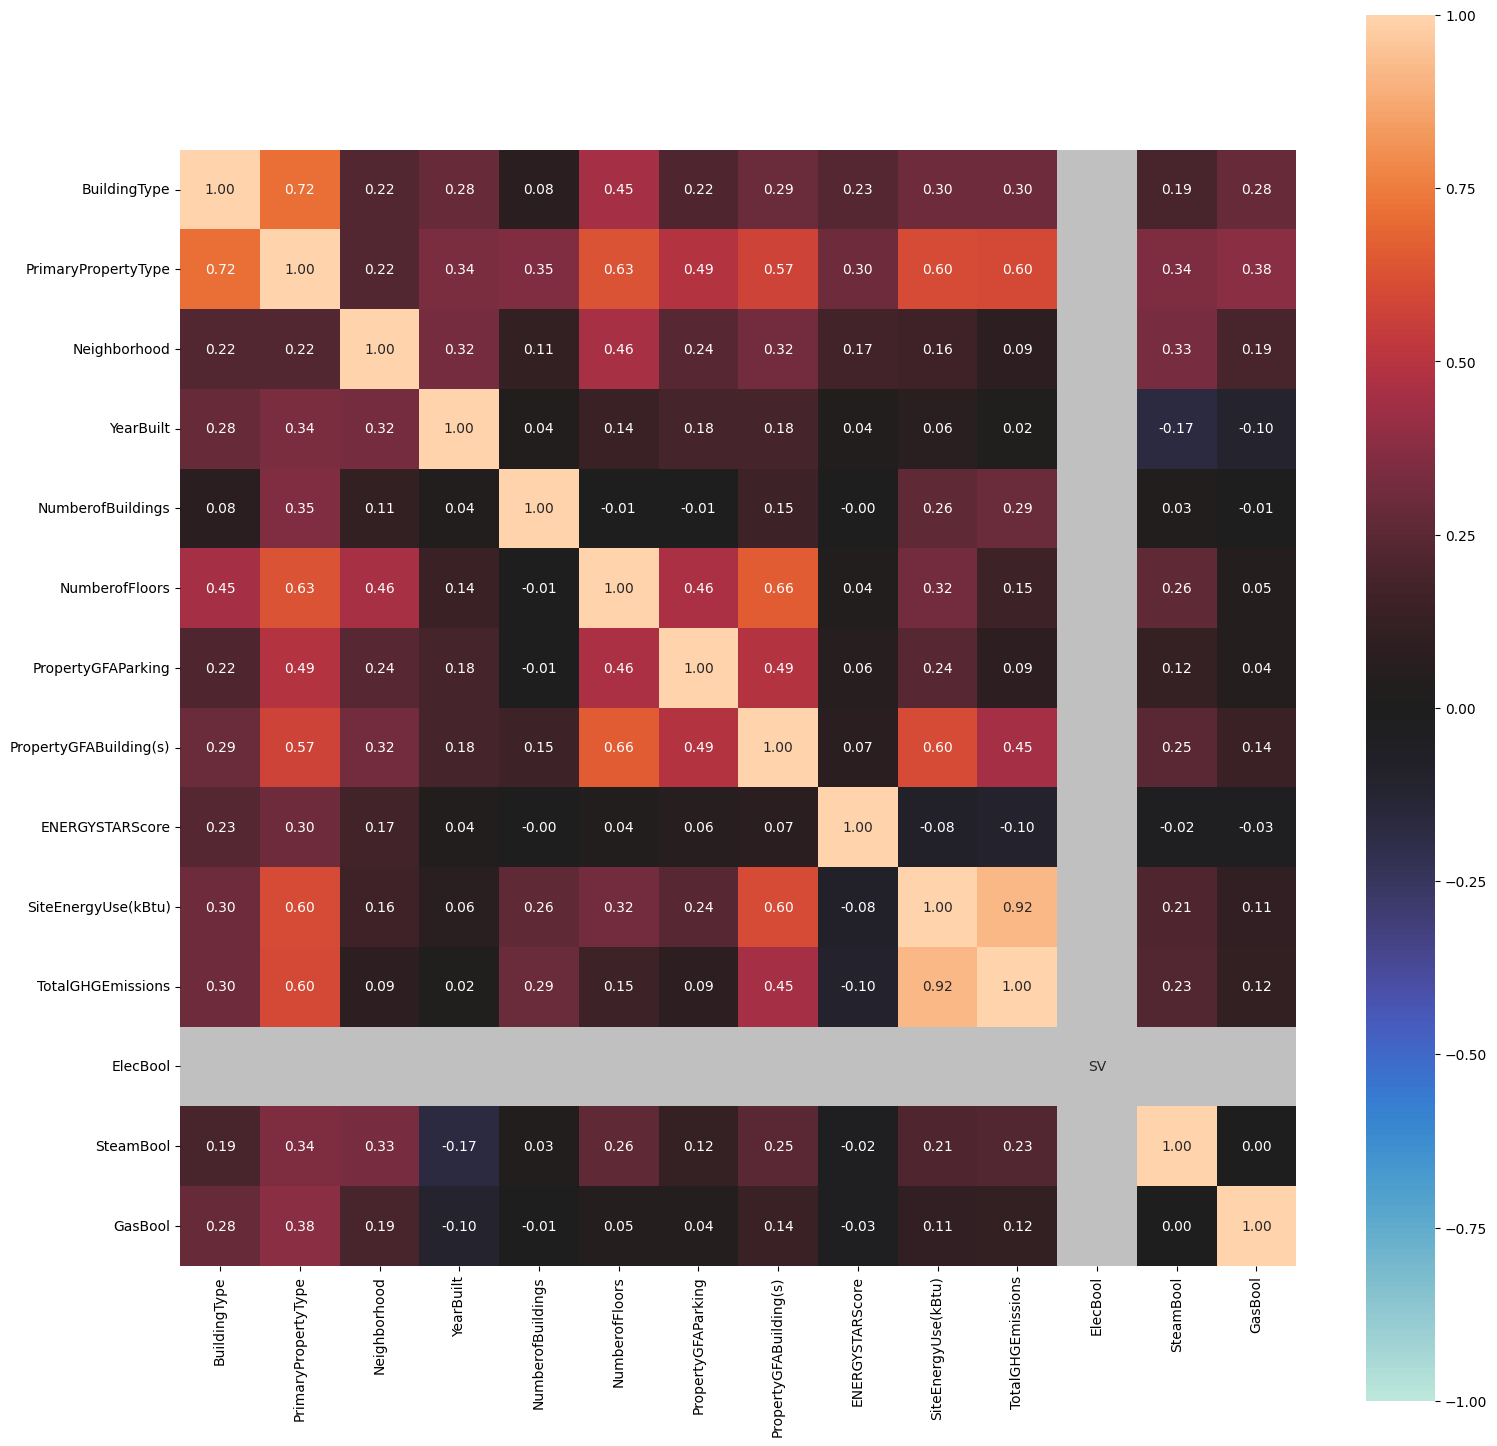

In [46]:
corr_matrix = associations(df_cleaned.dropna(), figsize=(18,18))

### Suppression variables Energy (data leak)

- ElecBool all true => Tout les logements consomment de l'éléctricité

In [47]:
energy_to_drop = ['ElecBool']

df_cleaned.drop(columns= energy_to_drop, inplace=True)
df_cleaned.shape

(3204, 13)

### Suppression des outliers ?

In [48]:
def outliers_detection(dataframe, key):
    """ Fonction de détection et des outliers définis selon la règle des interquartiles """
    
    stats = dataframe.describe() # Tableau de statistiques
    Q1 = stats.loc['25%', key]   # Premier quartile
    Q3 = stats.loc['75%', key]   # Troisième quartile
    IQR = Q3 - Q1             # inter-quartile range
    
    # Définition du mask
    mask = (dataframe[key] < Q1 - 1.5*IQR) | (dataframe[key] > Q3 + 1.5*IQR)
    
    # Application du mask
    outliers = dataframe[mask]
    
    # Affichage du nombre d'outliers
    print("Nombre d'outliers:", len(mask[mask]))
    
    # Renvoi le filtre pour éventuelle suppression
    return mask

In [49]:
mask1 = outliers_detection(df_cleaned, 'TotalGHGEmissions')
mask2 = outliers_detection(df_cleaned, 'SiteEnergyUse(kBtu)')

Nombre d'outliers: 348
Nombre d'outliers: 371


In [50]:
df_cleaned = df_cleaned[~(mask1 | mask2)]
df_cleaned

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SteamBool,GasBool
6,NonResidential,Hotel,DOWNTOWN,1926,1.0,11,0,83008,27.0,5.758795e+06,176.14,False,True
7,NonResidential,Other,DOWNTOWN,1926,1.0,8,0,102761,NaN,6.298132e+06,221.51,True,True
9,Multifamily MR (5-9),Mid-Rise Multifamily,DOWNTOWN,1910,1.0,6,1496,62216,1.0,4.573777e+06,151.12,True,True
23,NonResidential,Hotel,NORTHEAST,2001,1.0,6,30586,58006,84.0,3.663534e+06,90.01,False,True
25,NonResidential,Other,DOWNTOWN,1930,1.0,2,0,67224,NaN,1.310237e+06,9.13,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368,Nonresidential COS,Mixed Use Property,CENTRAL,1994,1.0,1,0,20050,NaN,1.813404e+06,60.81,False,True
3370,Nonresidential COS,Other,DELRIDGE NEIGHBORHOODS,1982,1.0,1,0,18261,NaN,9.320821e+05,20.33,False,True
3372,Nonresidential COS,Other,DOWNTOWN,2004,1.0,1,0,16000,NaN,9.502762e+05,32.17,False,True
3374,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989,1.0,1,0,14101,NaN,7.194712e+05,22.11,False,True


### Suppression des valeurs manquantes ?

In [51]:
df_cleaned.isna().sum()

BuildingType                0
PrimaryPropertyType         0
Neighborhood                0
YearBuilt                   0
NumberofBuildings           0
NumberofFloors              0
PropertyGFAParking          0
PropertyGFABuilding(s)      0
ENERGYSTARScore           674
SiteEnergyUse(kBtu)         0
TotalGHGEmissions           0
SteamBool                   0
GasBool                     0
dtype: int64

On ne supprime pas les valeurs manquantes, car elles ne concerne que l'ES Score. Nous séparerons les cas lors de la phase de modélisation.

# Sauvegarde

In [52]:
df_cleaned.to_csv('data_cleaned.csv', index=False)